# Experiment 2

Experiment 2 aims to explore the effect of the swarm type on the novelty scores of the simulation. The swarm type is the type of swarm that is used to generate the simulation. The swarm types are:
- No swarm
- Naive swarm
- Informed Swarm: Threshold = Mean
- Informed Swarm: Threshold = Median

The novelty score is the proportion of new nodes visited in that turn out of all the nodes visited that turn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [3]:
# Relative Path to Network INP File
network_file = 'networks/Net3.inp'
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start pool: {start_pool}")
print(f"Number of start nodes: {len(start_pool)}")
print(f"Number of nodes: {len(g.nodes)}")

Start pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of start nodes: 16
Number of nodes: 97


## Create simulations
### Simulation parameters:
- env: the network environment - Net3
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [4]:
start_nodes = start_pool[:15]
num_agents = 10
max_turns = 100

print(f"Start nodes: {start_nodes}")

Start nodes: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2']


# Function Definitions

In [5]:
# Function to filter simulation results
def filter_results(dataframe, simulations, data_of_interest):
    # Get the results from each simulation
    for start_node, path in simulations:
        # Read the simulation results csv file
        temp = pd.read_csv(f'{path}/results.csv')
        
        # Drop all the columns except the data of interest and turns
        temp = temp[['turn', data_of_interest]]
        
        # Transpose the dataframe
        temp = temp.T
        
        # Set the turns as the column names
        temp.columns = temp.iloc[0].astype(int)
        
        # Drop the turns row
        temp = temp.drop('turn')
        
        # Add the start node as a column
        temp['start_node'] = start_node
        
        # If the dataframe is empty, set it to the temp dataframe
        if dataframe.empty:
            dataframe = temp
        # Else, append the temp dataframe to the dataframe
        else:
            dataframe = pd.concat([dataframe, temp])
            
    # Create rows with the mean, max and min of each column
    dataframe.loc['mean'] = dataframe.mean(numeric_only=True, axis=0)
    dataframe.loc['max'] = dataframe.max(numeric_only=True, axis=0)
    dataframe.loc['min'] = dataframe.min(numeric_only=True, axis=0)
    
    # Return the dataframe
    return dataframe

### Experiment 2.1
- env: Net3
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment2/NoSwarm

In [6]:
simulations_2_1 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-2/NoSwarm")
    simulations_2_1.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_1}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-2/NoSwarm/simulation_20230329_124955'), ('35', 'notable-results/Experiment-2/NoSwarm/simulation_20230329_124957'), ('131', 'notable-results/Experiment-2/NoSwarm/simulation_20230329_124959'), ('166', 'notable-results/Experiment-2/NoSwarm/simulation_20230329_124959'), ('167', 'notable-results/Experiment-2/NoSwarm/simulation_20230329_125000'), ('2

#### Experiment 2.1.1

Examine the node novelty score of each turn

In [7]:
df_2_1_1 = pd.DataFrame()
df_2_1_1 = filter_results(df_2_1_1, simulations_2_1, 'node_novelty_score')

#### Experiment 2.1.2

Examine the link novelty score of each turn

In [8]:
df_2_1_2 = pd.DataFrame()
df_2_1_2 = filter_results(df_2_1_2, simulations_2_1, 'link_novelty_score')

### Experiment 1.2
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment2/NaiveSwarm

In [9]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations_2_2 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-2/NaiveSwarm")
    simulations_2_2.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_2}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-2/NaiveSwarm/simulation_20230329_125010'), ('35', 'notable-results/Experiment-2/NaiveSwarm/simulation_20230329_125010'), ('131', 'notable-results/Experiment-2/NaiveSwarm/simulation_20230329_125011'), ('166', 'notable-results/Experiment-2/NaiveSwarm/simulation_20230329_125012'), ('167', 'notable-results/Experiment-2/NaiveSwarm/simulation_2023032

#### Experiment 2.2.1

Examine the node novelty score of each turn

In [10]:
df_2_2_1 = pd.DataFrame()
df_2_2_1 = filter_results(df_2_2_1, simulations_2_2, 'node_novelty_score')

#### Experiment 2.2.2

Examine the link novelty score of each turn

In [11]:
df_2_2_2 = pd.DataFrame()
df_2_2_2 = filter_results(df_2_2_2, simulations_2_2, 'link_novelty_score')

### Experiment 2.3

- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment2/InformedMeanSwarm

In [12]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations_2_3 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-2/InformedMeanSwarm")
    simulations_2_3.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_3}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-2/InformedMeanSwarm/simulation_20230329_125020'), ('35', 'notable-results/Experiment-2/InformedMeanSwarm/simulation_20230329_125021'), ('131', 'notable-results/Experiment-2/InformedMeanSwarm/simulation_20230329_125022'), ('166', 'notable-results/Experiment-2/InformedMeanSwarm/simulation_20230329_125023'), ('167', 'notable-results/Experiment-2/I

#### Experiment 2.3.1

Examine the node novelty score of each turn

In [13]:
df_2_3_1 = pd.DataFrame()
df_2_3_1 = filter_results(df_2_3_1, simulations_2_3, 'node_novelty_score')

#### Experiment 2.3.2

Examine the link novelty score of each turn

In [14]:
df_2_3_2 = pd.DataFrame()
df_2_3_2 = filter_results(df_2_3_2, simulations_2_3, 'link_novelty_score')

### Experiment 2.4

- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: 15 nodes from start node pool
- max_turns: 100
- filepath: notable-results/Experiment2/InformedMedianSwarm

In [15]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations_2_4 = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-2/InformedMedianSwarm")
    simulations_2_4.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print(f"Done: {simulations_2_4}")

Starting simulation with start node: 15
Starting simulation with start node: 35
Starting simulation with start node: 131
Starting simulation with start node: 166
Starting simulation with start node: 167
Starting simulation with start node: 203
Starting simulation with start node: 219
Starting simulation with start node: 225
Starting simulation with start node: 231
Starting simulation with start node: 243
Starting simulation with start node: 253
Starting simulation with start node: River
Starting simulation with start node: Lake
Starting simulation with start node: 1
Starting simulation with start node: 2
Done: [('15', 'notable-results/Experiment-2/InformedMedianSwarm/simulation_20230329_125032'), ('35', 'notable-results/Experiment-2/InformedMedianSwarm/simulation_20230329_125032'), ('131', 'notable-results/Experiment-2/InformedMedianSwarm/simulation_20230329_125033'), ('166', 'notable-results/Experiment-2/InformedMedianSwarm/simulation_20230329_125034'), ('167', 'notable-results/Experi

#### Experiment 2.4.1

Examine the node novelty score of each turn

In [16]:
df_2_4_1 = pd.DataFrame()
df_2_4_1 = filter_results(df_2_4_1, simulations_2_4, 'node_novelty_score')

#### Experiment 2.4.2

Examine the link novelty score of each turn

In [17]:
df_2_4_2 = pd.DataFrame()
df_2_4_2 = filter_results(df_2_4_2, simulations_2_4, 'link_novelty_score')

## Analysis

In [18]:
# Function to create a dataframe with the results of the experiment
from typing import List

def create_dataframe(swarm_types:list, experiment_dataframes:List[pd.DataFrame]):
    # Create a new dataframe
    df = pd.DataFrame()
    # Zip the swarm types and the dataframes together
    for swarm_type, dataframe in zip(swarm_types, experiment_dataframes):
        df[f'{swarm_type}-mean'] = dataframe.loc['mean']
        df[f'{swarm_type}-max'] = dataframe.loc['max']
        df[f'{swarm_type}-min'] = dataframe.loc['min']
        
    # Drop any columns that are all NaN
    df = df.dropna(axis=1, how='all')
    
    # Drop any rows that are all NaN
    df = df.dropna(axis=0, how='all')
        
    # Return the dataframe
    return df

### Experiment 2.X.1 - Node Novelty Score of Each Turn

In [19]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_2_1_1, df_2_2_1, df_2_3_1, df_2_4_1]

experiment_2_1_results = create_dataframe(swarm_types, experiment_dataframes)

# experiment_2_1_results

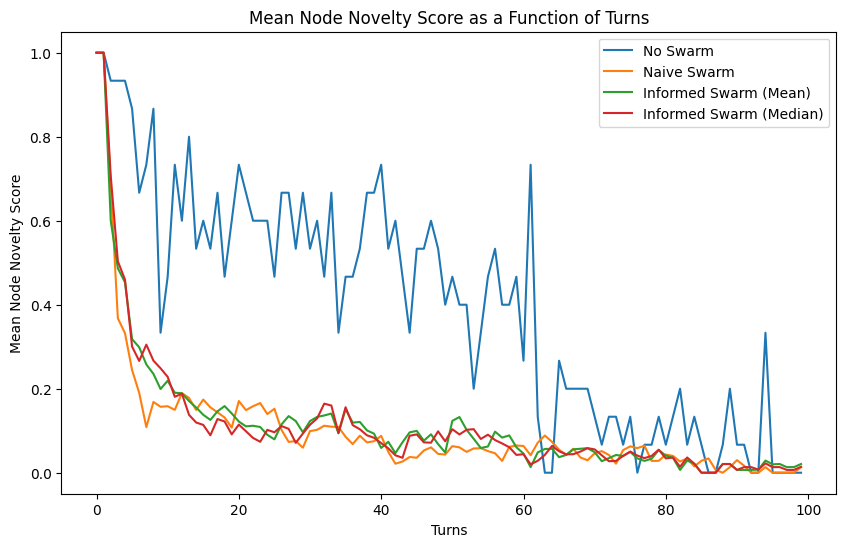

In [20]:
# Plot the novelty scores as a function of turns for each swarm type
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean node novelty score for each swarm type
ax.plot(experiment_2_1_results.index, experiment_2_1_results['no-swarm-mean'], label='No Swarm')
ax.plot(experiment_2_1_results.index, experiment_2_1_results['naive-mean'], label='Naive Swarm')
ax.plot(experiment_2_1_results.index, experiment_2_1_results['informed-mean-mean'], label='Informed Swarm (Mean)')
ax.plot(experiment_2_1_results.index, experiment_2_1_results['informed-median-mean'], label='Informed Swarm (Median)')

# Set the title and labels
ax.set_title('Mean Node Novelty Score as a Function of Turns')
ax.set_xlabel('Turns')
ax.set_ylabel('Mean Node Novelty Score')

# Set the legend
ax.legend()

# Show the plot
plt.show()

### Experiment 2.X.2 - Link Novelty Score of Each Turn

In [21]:
swarm_types = ['no-swarm', 'naive', 'informed-mean', 'informed-median']
experiment_dataframes = [df_2_1_2, df_2_2_2, df_2_3_2, df_2_4_2]

experiment_2_2_results = create_dataframe(swarm_types, experiment_dataframes)

# experiment_2_2_results

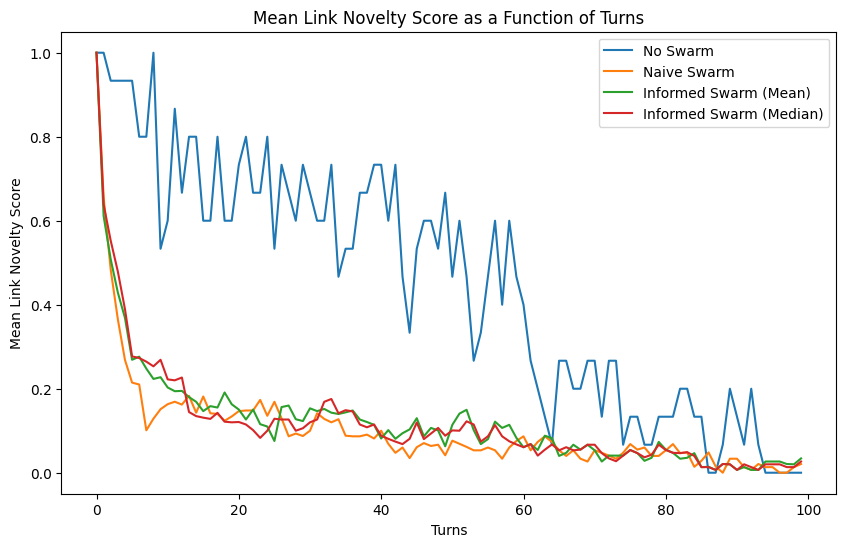

In [22]:

# Plot the novelty scores as a function of turns for each swarm type
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean link novelty score for each swarm type
ax.plot(experiment_2_2_results.index, experiment_2_2_results['no-swarm-mean'], label='No Swarm')
ax.plot(experiment_2_2_results.index, experiment_2_2_results['naive-mean'], label='Naive Swarm')
ax.plot(experiment_2_2_results.index, experiment_2_2_results['informed-mean-mean'], label='Informed Swarm (Mean)')
ax.plot(experiment_2_2_results.index, experiment_2_2_results['informed-median-mean'], label='Informed Swarm (Median)')

# Set the title and labels
ax.set_title('Mean Link Novelty Score as a Function of Turns')
ax.set_xlabel('Turns')
ax.set_ylabel('Mean Link Novelty Score')

# Set the legend
ax.legend()

# Show the plot
plt.show()